In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.feature_selection import VarianceThreshold

In [2]:
# train and test data
train_data=pd.read_csv(r'C:\Users\User\Desktop\ms\model selection\train.csv')

In [3]:
y=train_data.iloc[:,-1]
x=train_data.iloc[:,:-1]

In [4]:
# train_test split of data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
X_train.shape,X_test.shape

((60816, 370), (15204, 370))

# Basic method

In [6]:
#removing constant feature
constant_filter=VarianceThreshold(threshold=0)
constant_filter.fit(X_train)

constant_list=[not temp for temp in constant_filter.get_support()]

X_train_filter=constant_filter.transform(X_train)

X_test_filter=constant_filter.transform(X_test)

In [7]:
#QUASI CONSTANT FEATURE REMOVAL

qconst_filter=VarianceThreshold(threshold=.01)
qconst_filter.fit(X_test_filter)

X_train_quasi_filter=qconst_filter.transform(X_train_filter)

X_test_quasi_filter=qconst_filter.transform(X_test_filter)

In [8]:
# DUPLICATE FEATURE REMOVING

X_train_T=X_train_quasi_filter.T
X_test_T=X_test_quasi_filter.T

X_train_T=pd.DataFrame(X_train_T)
X_test_T=pd.DataFrame(X_test_T)

duplicated_feature=X_train_T.duplicated()

feature_to_keep=[not index for index in duplicated_feature]

X_train_unique=pd.DataFrame(X_train_T[feature_to_keep].T)

X_test_unique=pd.DataFrame(X_test_T[feature_to_keep].T)

# ROC_AUC METHOD FOR CLASSICATION

In [22]:
roc_auc=[]
for feature in  X_train_unique.columns:
    rf=RandomForestClassifier(n_estimators=100)
    rf.fit(X_train_unique[feature].to_frame(),y_train)
    pred=rf.predict(X_test_unique[feature].to_frame())
    roc_auc.append(roc_auc_score(y_test,pred))

In [23]:
roc_auc

[0.5025412463836109,
 0.5,
 0.5,
 0.5006450856204551,
 0.49964813511611533,
 0.497707991242474,
 0.4999315818281336,
 0.4999657909140668,
 0.5,
 0.5,
 0.5008161310501212,
 0.49869516772226136,
 0.4987635858941278,
 0.5005082492767222,
 0.5015296348424427,
 0.5002590116506372,
 0.49976053639846746,
 0.5015638439283759,
 0.500053757135038,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.4998973727422003,
 0.4998973727422003,
 0.5,
 0.5,
 0.4999657909140668,
 0.4998973727422003,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.4999315818281336,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.4999657909140668,
 0.5011777699585581,
 0.5058106575963719,
 0.49976053639846746,
 0.5,
 0.5,
 0.5,
 0.49993158182

In [24]:
roc_values=pd.Series(roc_auc)
roc_values.index=X_train_unique.columns
roc_values.sort_values(ascending=False,inplace=True)

In [25]:
select=roc_values[roc_values>.5] # roc_value less than .5 means it's random selection

In [26]:
X_train_roc=X_train_unique[select.index]
X_test_roc=X_test_unique[select.index]

In [27]:
X_train_roc.shape , X_test_roc.shape

((60816, 20), (15204, 20))

In [28]:
# model evalution
def run_RandomForest(X_train,X_test,y_train,y_test):
    rf=RandomForestClassifier(n_estimators=100,random_state=42)
    rf.fit(X_train,y_train)
    pred=rf.predict(X_test)
    print("accuracy of model:",accuracy_score(y_test,pred))

In [29]:
%%time
run_RandomForest(X_train_unique,X_test_unique,y_train,y_test)

accuracy of model: 0.9596816627203367
Wall time: 1min 7s


In [30]:
%%time
run_RandomForest(X_train_roc,X_test_roc,y_train,y_test)

accuracy of model: 0.9551433833201789
Wall time: 56.1 s


# regression problem

In [31]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.feature_selection import SelectKBest,SelectPercentile

In [32]:
boston =load_boston()

x=pd.DataFrame(data=boston.data,columns=boston.feature_names)

y=boston.target

In [33]:
# train_test split of data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [34]:
X_train.shape ,X_test.shape

((404, 13), (102, 13))

In [36]:
mse=[]
for feature in X_train.columns:
    lr=LinearRegression()
    lr.fit(X_train[feature].to_frame(),y_train)
    pred=lr.predict(X_test[feature].to_frame())
    mse.append(mean_squared_error(y_test,pred))

In [38]:
mse=pd.Series(mse)
mse.index=X_train.columns
mse.sort_values(ascending=False,inplace=True)

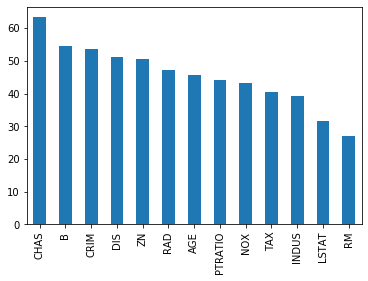

In [39]:
mse.plot.bar()

In [40]:
select=mse[mse<50]

In [41]:
X_train_mse=X_train[select.index]

X_test_mse=X_test[select.index]

In [42]:
X_train_mse.shape ,X_test_mse.shape

((404, 8), (102, 8))

In [ ]:
#model evalution

In [43]:
def run_regression(X_train,X_test,y_train,y_test):
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    print('r2_score',r2_score(y_test,pred))
    print('RMSE :',np.sqrt(mean_squared_error(y_test,pred)))

In [44]:
%%time
#without feature selection
run_regression(X_train,X_test,y_train,y_test)

r2_score 0.7359868475852245
RMSE : 3.940779862129445
Wall time: 211 ms


In [45]:
%%time
run_regression(X_train,X_test,y_train,y_test)

r2_score 0.7359868475852245
RMSE : 3.940779862129445
Wall time: 38 ms
